In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

## You will find my data-cleaning proces in my notebook DataClean_lsData9mrt.ipynb

In [98]:
#Read csv file
# lsd = LifeStyleData
lsd = pd.read_csv('lsdata230309.csv', index_col = 0)


## Exploratory Data Analysis

In [99]:
lsd.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0


In [100]:
lsd.tail()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
4091,80.3,176.0,115.9,3.7,0.1,5.6,5.8,80.7
4092,75.3,162.0,129.6,3.6,6.2,5.6,7.6,71.1
4093,93.1,189.0,115.3,2.7,9.4,4.9,6.6,90.0
4094,77.9,170.0,90.8,2.3,13.2,0.8,6.2,75.9
4095,101.3,188.0,129.2,1.2,8.2,6.0,6.2,96.9


In [101]:
lsd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4086 non-null   float64
 1   length    4086 non-null   float64
 2   mass      4086 non-null   float64
 3   exercise  4086 non-null   float64
 4   smoking   4086 non-null   float64
 5   alcohol   4086 non-null   float64
 6   sugar     4086 non-null   float64
 7   lifespan  4086 non-null   float64
dtypes: float64(8)
memory usage: 287.3 KB


In [102]:
lsd.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000
mean,82.280127,183.879344,92.273837,2.403353,9.812677,2.266006,6.484973,80.137959
std,7.440070,12.627470,25.800771,1.170593,6.919057,1.801020,2.709868,8.041656
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,-1.000000
25%,77.600000,175.000000,71.425000,1.500000,3.400000,0.600000,4.400000,75.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000
75%,86.700000,193.000000,110.875000,3.200000,15.900000,4.000000,8.400000,85.200000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000


In [103]:
lsd.shape

(4086, 8)

In [104]:
# Lifespan cannot be negative. This must be fixed (= delete rows)
nls = lsd[(lsd < 0).any(axis=1)]
display(nls)

print()

indexnls = lsd[(lsd < 0).any(axis=1)].index
display(indexnls) # check: only 2 rows
print()
lsd = lsd.drop(indexnls).copy() # drop the rows  
display(lsd.shape) # check the shape after deletion (must be 4086 - 2 = 4084 rows)
print()

display(indexnls) # check: must return an empty list

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
889,88.1,156.0,112.9,0.7,19.5,0.9,3.0,-1.0
2300,82.6,188.0,63.1,3.6,15.0,0.2,1.0,-1.0


Int64Index([889, 2300], dtype='int64')

(4084, 8)

Int64Index([889, 2300], dtype='int64')

In [105]:
duplicate_rows_lsd = lsd[lsd.duplicated()]
print("number of duplicate rows: ", duplicate_rows_lsd.shape)
# Conclusion: no duplicate rows

number of duplicate rows:  (0, 8)


In [106]:
display(lsd.isna().any().sum()) #telt het aantal kolommen met een Nan waarde
#display(lsd.isna().sum()) # toont het aantal kolommen met de aantallen NaN waardes 

0

### Observations:

- 'genetic' age lies between 63.9 and 102.2 years. This seems quite normal.
- 'length' min: 154 cm, max: 214 cm. 214 cm is very tall, but not impossible (acromegaly). Are there many entries over 200 cm?
- 'mass' min: 50 kg, max: 163.6 kg. The max weight seems extreme, but is not unheard of. 
- 'exercise' between min: 0.1 hours (= 6 minutes), max: 5.5 hours (= 5 hrs and 30 minutes) per day. Seems 'normal'.
- 'smoking' : min: 0 en max: 22.2 cigarettes per day. 
- 'alcohol': min: 0 en max: 6 glasses per day.
- 'sugar' intake per day: min: 0.7 sugarcubes,  max: 13.8 sugarcubes per day.
- lifespan:  was minimal: -1 years, max: 105.1 years. The minimum lifspan cannot be negative. These 2 entries were deleted. The max lifespan seems quite old, but is not unheard of. Maybe someone who lived a very healthy life? 
- It could be useful to create a column 'bmi'?

## Inspecting the variables, looking for outliers
Boxplots and scatterplots


### Genetic

<AxesSubplot: xlabel='genetic'>

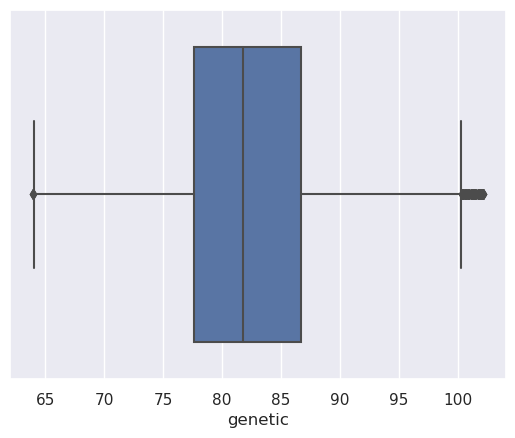

In [107]:
# Boxplot 'genetic'
sns.boxplot(x=lsd['genetic'])

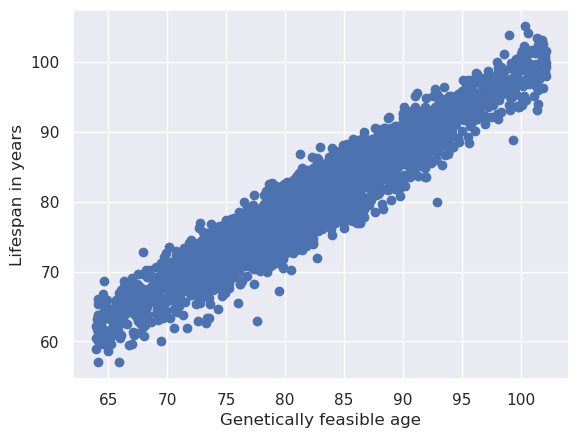

In [108]:
#scatterplot lifespan on the X-axis and genetic on the y-axis
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
#matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
y= lsd['lifespan']
x = lsd['genetic']
ylabel = plt.ylabel('Lifespan in years')
xlabel = plt.xlabel('Genetically feasible age')
display(plt.scatter(x, y))


Genetically people should be able to live at least 63 years. 

The visualisation shows a positive relation between genetically feasible age and their lifespan.

### Length

In [109]:
overTwoMtrs = lsd.query("length > 200") 
display(overTwoMtrs.shape) # Apparently there are 429 persons who are over 2 mtrs tall
print()
lengthOver210 = lsd.loc[lsd['length'] > 210]
display(lengthOver210.shape) # Apparently there are 54 persons who are over 2.1 mtrs tall
print()
length214 = lsd.loc[lsd['length'] == 214]
display(length214.shape) #there are 7 persons who are  2.14 mtrs tall

(429, 8)

(54, 8)

(7, 8)

<AxesSubplot: xlabel='length'>

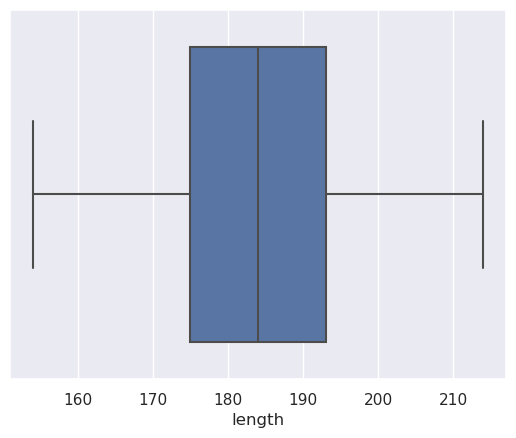

In [110]:
# Boxplot 'length'
sns.boxplot(x=lsd['length'])

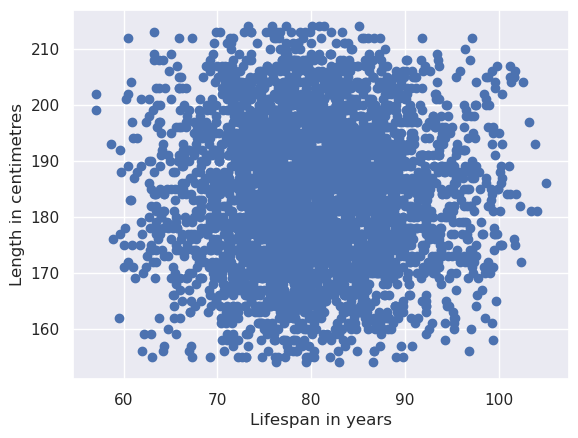

In [111]:
x= lsd['lifespan']
y = lsd['length']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Length in centimetres')
display(plt.scatter(x, y))

From this visualisation, I conclude that 'length' and (expected) lifespan have little correlation.  
(Lifespan outliers will be dealt with later.)

### Mass

<AxesSubplot: xlabel='mass'>

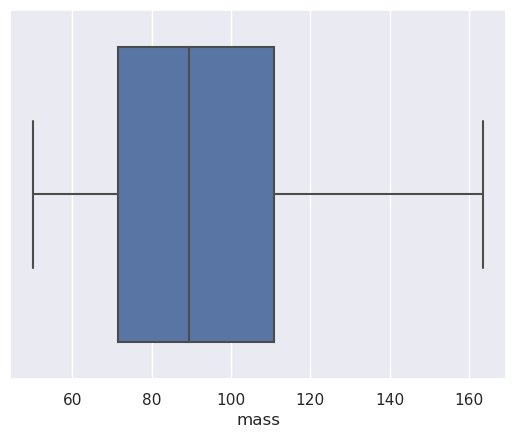

In [112]:
# Boxplot 'mass'
sns.boxplot(x= lsd['mass'])

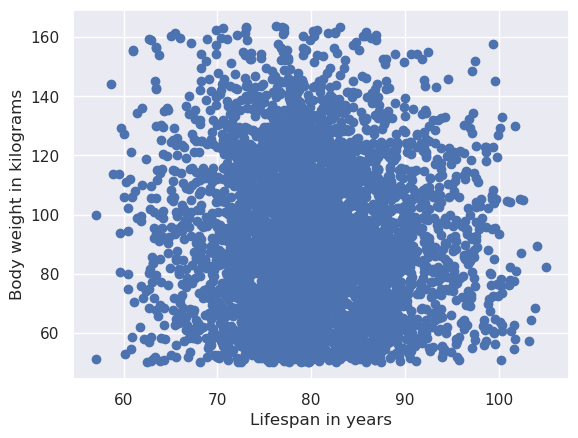

In [113]:
x= lsd['lifespan']
y = lsd['mass']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Body weight in kilograms')
display(plt.scatter(x, y))

From this visualisation, I conclude that body weight and (calculated) lifespan show a very weak negative correlation (the higher the body weight the lower the lifespan).

### Exercise

<AxesSubplot: xlabel='exercise'>

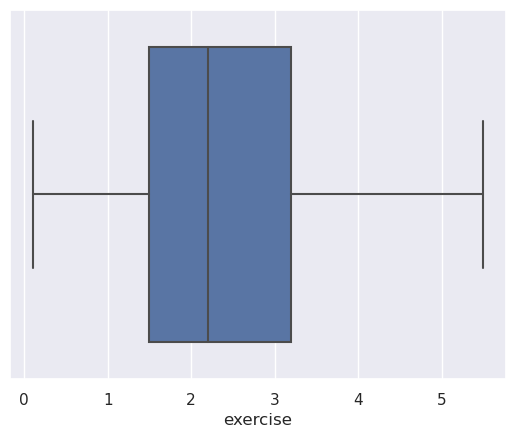

In [114]:
# Boxplot 'exercise'
sns.boxplot(x=lsd['exercise'])

In [115]:
overThreeHrsEx  = lsd.loc[lsd['exercise'] > 3]
display(overThreeHrsEx.shape)

# Apparently 1140 persons exercise over 3 hrs per day

(1139, 8)

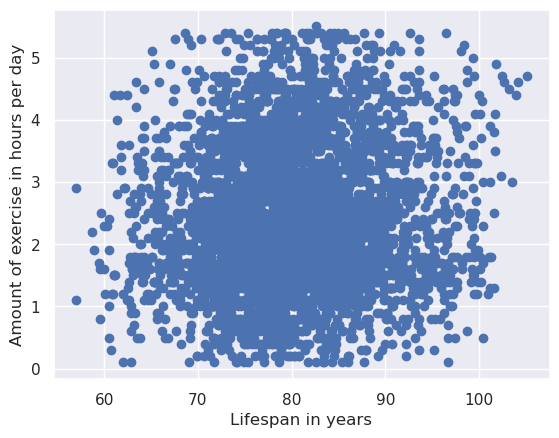

In [116]:
x = lsd['lifespan']
y = lsd['exercise']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Amount of exercise in hours per day')
display(plt.scatter(x, y))

From this visualisation, I conclude that 'exercise' and (expected) lifespan have little correlation.  

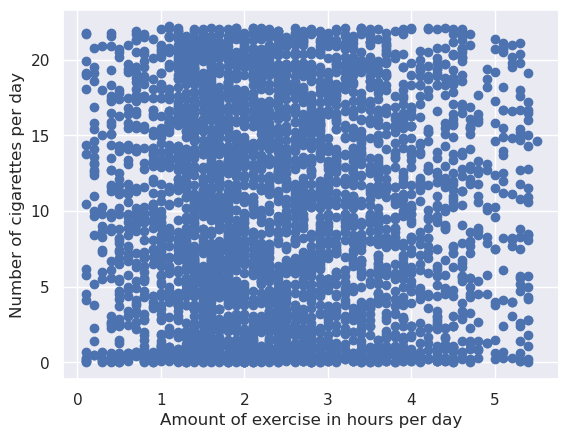

In [117]:
x = lsd['exercise']
y = lsd['smoking']
xlabel = plt.xlabel('Amount of exercise in hours per day')
ylabel = plt.ylabel('Number of cigarettes per day')
display(plt.scatter(x, y))

In [118]:
heaSmokSport = lsd.query('exercise > 3.0 and smoking >= 22')
display(heaSmokSport)
display(heaSmokSport.shape)
# 17 people exercise more than 3 hrs per day AND smoke 22 to '22-something' cigarettes per day

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
858,98.3,182.0,64.2,4.5,22.0,0.4,3.9,96.3
1175,91.7,184.0,81.4,4.2,22.0,5.2,7.9,86.6
1352,86.4,177.0,94.5,4.2,22.1,3.9,9.7,84.1
1454,85.0,177.0,111.6,3.4,22.0,1.2,5.9,79.4
1552,83.7,181.0,125.7,4.0,22.1,5.2,4.4,81.4
2073,83.2,181.0,62.1,3.5,22.0,3.4,4.7,81.0
2218,85.9,199.0,143.5,3.4,22.1,1.6,3.2,80.4
2837,83.6,197.0,113.3,4.3,22.0,1.8,10.3,83.4
2867,80.2,195.0,71.8,3.4,22.0,0.7,4.7,76.8
2921,67.2,200.0,69.3,3.2,22.1,1.5,3.1,63.9


(17, 8)

Strange. I queried for entries that score ' 22 and higher' on smoking. There seem to be 17 of them.  
When I look close I see that the maximum amout of cigarettes is '22.1' while lsd.describe() states that '22.2' is the max.  
Why this diference?  
It can't be a matter of rounding the numbers...

### Smoking

<AxesSubplot: xlabel='smoking'>

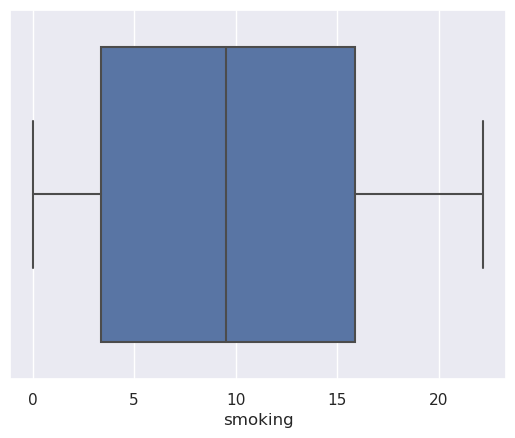

In [119]:
# Boxplot 'smoking'
sns.boxplot(x=lsd['smoking'])
# No outliers

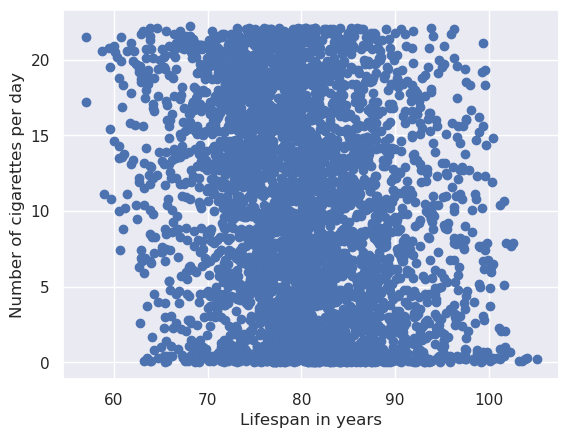

In [120]:
x = lsd['lifespan']
y = lsd['smoking']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Number of cigarettes per day')
display(plt.scatter(x, y))

I conclude from this visualisation that 'smoking' and (calculated) lifespan show a quite weak negative correlation (the more cigarettes per day the lower the lifespan). 

### Sugar

<AxesSubplot: xlabel='sugar'>

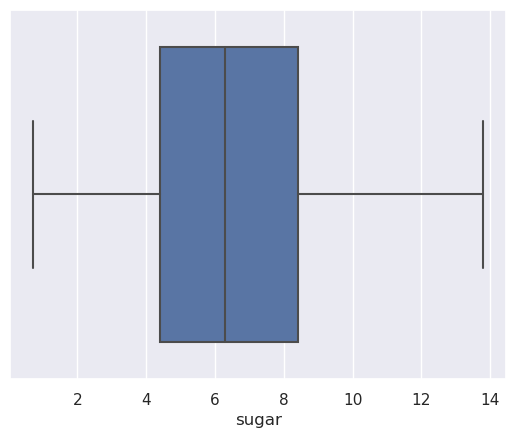

In [121]:
# Boxplot 'sugar'
sns.boxplot(x=lsd['sugar'])

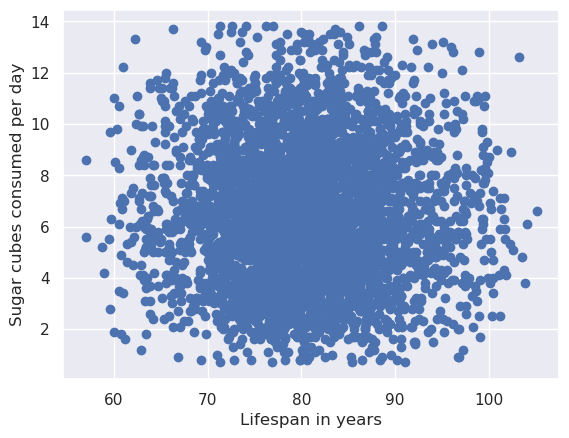

In [122]:
x = lsd['lifespan']
y = lsd['sugar']
xlabel = plt.xlabel('Lifespan in years')
ylabel = plt.ylabel('Sugar cubes consumed per day')
display(plt.scatter(x, y))

From this visualisation I conclude that there is barely any correlation between sugarconsumption and the (calculated) lifespan.  
I am beginning to wonder which factor(s) do significally influence the lifespan of people?

### Lifespan

<AxesSubplot: xlabel='lifespan'>

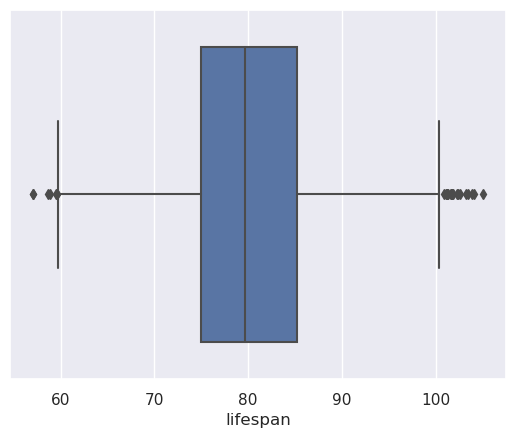

In [123]:
# Boxplot 'lifespan'
sns.boxplot(x= lsd['lifespan'])
# There are outliers here

In [124]:
# So there may be lifespan-outliers here (Age limits chosen on sight.)

lifespOutl = lsd.query('lifespan <= 60' and 'lifespan >= 100') 
display(lifespOutl.shape)

# Apparently in this population there were a total of 31 people with a lifespan'60 or younger' or ' 100 or older'.

# Apparently in this population there were 9 people with a lifespan'46 or younger'
display(lsd.columns)
# No bmi column the first time

(31, 8)

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar',
       'lifespan'],
      dtype='object')

## BMI column calculated on original dataframe (with outliers)

### What is a healthy BMI?
BMI gives an estimate of how healthy your body weight is. You can calculate BMI for women, men and children from 2 years of age.  

BMI is less suitable if you are very muscular, pregnant, breastfeeding or of Asian descent.  
*Note:* we have no information about the different races in our population.  
For adults, a healthy BMI is between 18.5 and 25. But this does not apply to everyone.  
For the elderly and children, different limits for underweight, overweight and healthy weight apply. 

### Outcome BMI from 70 years of age

There are no official cut-off points for BMI for people aged 70 and over. In the BMI meter, we have assumed BMI limits for underweight, healthy weight and (severe) overweight to be higher than 19-69. This is due to the risk of disease.  
This is because elderly people are only at higher risk of disease at a BMI score of 28 or higher, and are already at higher risk of malnutrition at a BMI score lower than 22.

More info on: https://www.voedingscentrum.nl/bmi

In [125]:
#BMI-column in orig df (with outliers), rounded to 0 marks behind the '.' 

lsd['bmi'] = round(lsd['mass']/((lsd['length']**2)*0.0001))
display(lsd.head())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.0
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,36.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,23.0


In [126]:
lsd.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,6.487169,80.177693,27.681685
std,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,2.708622,7.840508,8.710015
min,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,57.000000,11.000000
25%,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,4.400000,75.000000,21.000000
50%,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,6.300000,79.700000,26.000000
75%,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,8.400000,85.200000,33.000000
max,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,105.100000,66.000000


<AxesSubplot: xlabel='bmi'>

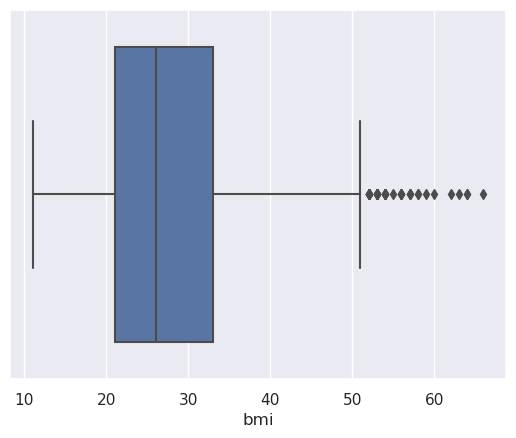

In [127]:
# Boxplot 'bmi'
sns.boxplot(x=lsd['bmi'])
# There may be outliers here

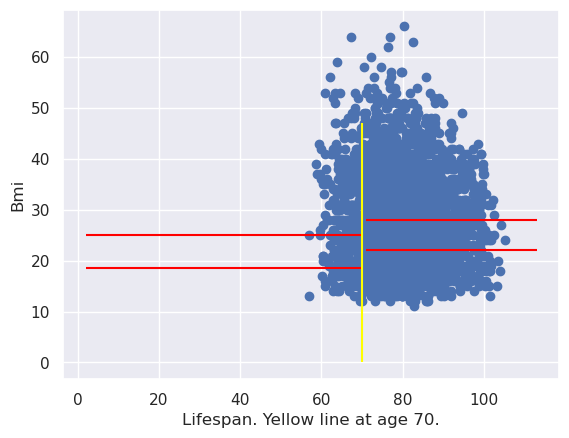

In [128]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html
# matplotlib.pyplot.hlines(y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
x = lsd['lifespan']
y = lsd['bmi']
color1 = ['red']
color2 = ['yellow']
minBmi = plt.hlines(18.5, xmin = 2, xmax = 70, colors = color1)
maxBmi = plt.hlines(25, xmin = 2, xmax = 70, colors = color1)
minBmiEld = plt.hlines(22, xmin = 71, xmax = 113, colors = color1)
maxBmiEld= plt.hlines(28, xmin = 71, xmax = 113, colors = color1)
age70 = plt.vlines(70, ymin = 0, ymax = 47, colors = color2)
xlabel = plt.xlabel('Lifespan. Yellow line at age 70.')
ylabel = plt.ylabel('Bmi')
display(plt.scatter(x, y))

I placed a yellow line at 70.  
It strikes me (by eye) that overweight is a huge problem in this population. 
Over 70 years of age a too low bmi seems to be common, but it does not seem to affect the calculated lifespan as a bmi which is too high.

## Heatmap



,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.029606,0.000513,-0.035005,-0.015490,-0.013170,0.018785,0.949799,0.009897
length,-0.029606,1.000000,0.000106,0.011401,-0.020691,-0.007162,0.007860,0.013155,-0.439426
mass,0.000513,0.000106,1.000000,0.008204,-0.009541,0.000726,0.005601,-0.066040,0.887222
exercise,-0.035005,0.011401,0.008204,1.000000,0.021512,-0.024521,-0.008328,0.082986,0.002187
smoking,-0.015490,-0.020691,-0.009541,0.021512,1.000000,-0.012298,0.008925,-0.246140,0.004580
alcohol,-0.013170,-0.007162,0.000726,-0.024521,-0.012298,1.000000,0.003860,-0.063539,0.003240
sugar,0.018785,0.007860,0.005601,-0.008328,0.008925,0.003860,1.000000,-0.010887,0.001929
lifespan,0.949799,0.013155,-0.066040,0.082986,-0.246140,-0.063539,-0.010887,1.000000,-0.073932
bmi,0.009897,-0.439426,0.887222,0.002187,0.004580,0.003240,0.001929,-0.073932,1.000000


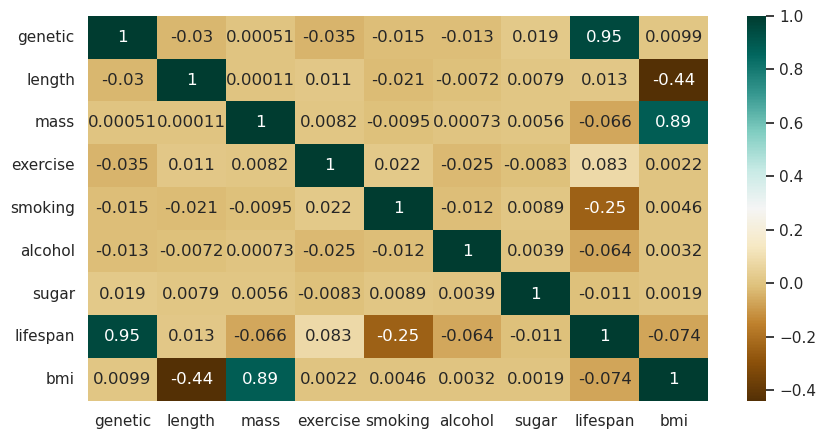

In [129]:
plt.figure(figsize=(10,5))
c= lsd.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Conclusions based on df with outliers
The strongest correlations seem to be between:  
- lifespan and genetic (+0.92): the better the one, the better the other one. __You can't influence that with lifestyle changes.__
- lifespan and smoking (- 0.25): the more one smokes, the less ones lifespan
- lifespan and alcohol (- 0.057): the more one consumes, the lower ones lifespan
- lifespan and exercise (+ 0.082): the more one exercises the longer the lifespan
- lifespan and bmi (- 0.074) : the lower ones bmi, te longer his/her lifespan


## New Dataframe (outliers discarded)

In [130]:
Q1 = lsd.quantile(0.25)
Q3 = lsd.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
lsdNoOutl = lsd[~((lsd < (Q1 - 1.5 * IQR)) |(lsd > (Q3 + 1.5 * IQR))).any(axis=1)]
lsdNoOutl.info()

genetic      77.600
length      175.000
mass         71.475
exercise      1.500
smoking       3.375
alcohol       0.600
sugar         4.400
lifespan     75.000
bmi          21.000
Name: 0.25, dtype: float64

genetic      86.700
length      193.000
mass        110.825
exercise      3.200
smoking      15.900
alcohol       4.000
sugar         8.400
lifespan     85.200
bmi          33.000
Name: 0.75, dtype: float64

genetic      9.100
length      18.000
mass        39.350
exercise     1.700
smoking     12.525
alcohol      3.400
sugar        4.000
lifespan    10.200
bmi         12.000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 4094
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   3975 non-null   float64
 1   length    3975 non-null   float64
 2   mass      3975 non-null   float64
 3   exercise  3975 non-null   float64
 4   smoking   3975 non-null   float64
 5   alcohol   3975

In [131]:
lsdNoOutl.describe()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,82.036403,184.054088,91.682566,2.404277,9.781031,2.270340,6.484528,79.987044,27.407044
std,7.086730,12.511810,25.225387,1.170234,6.912136,1.803633,2.708536,7.454091,8.290604
min,64.000000,154.000000,50.000000,0.100000,0.000000,0.000000,0.700000,59.700000,11.000000
25%,77.600000,175.000000,71.300000,1.500000,3.300000,0.600000,4.400000,75.000000,21.000000
50%,81.700000,184.000000,89.000000,2.200000,9.500000,1.700000,6.300000,79.600000,26.000000
75%,86.450000,193.000000,110.000000,3.200000,15.850000,4.000000,8.400000,84.900000,33.000000
max,100.300000,214.000000,163.600000,5.500000,22.200000,6.000000,13.800000,100.400000,51.000000


In [132]:
#Write lsd-without-outliers to csv
lsdNoOutl.to_csv('lsdNoOutl230310.csv')

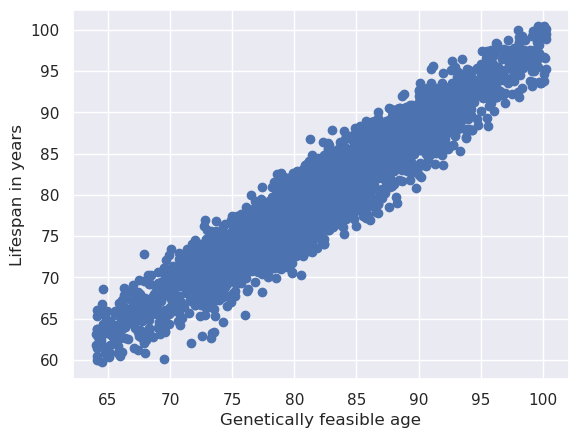

In [133]:
y= lsdNoOutl['lifespan']
x = lsdNoOutl['genetic']
ylabel = plt.ylabel('Lifespan in years')
xlabel = plt.xlabel('Genetically feasible age')
display(plt.scatter(x, y))

The obvious lifespan outliers have been erased

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
genetic,1.000000,-0.038565,-0.000688,-0.044848,-0.010379,-0.012591,0.018085,0.947369,0.013377
length,-0.038565,1.000000,0.033587,0.009143,-0.014092,-0.009894,0.009745,-0.002816,-0.417453
mass,-0.000688,0.033587,1.000000,0.015846,-0.017288,-0.001209,0.006181,-0.056138,0.884226
exercise,-0.044848,0.009143,0.015846,1.000000,0.027391,-0.020558,-0.007418,0.075793,0.011194
smoking,-0.010379,-0.014092,-0.017288,0.027391,1.000000,-0.008698,0.011161,-0.250196,-0.005903
alcohol,-0.012591,-0.009894,-0.001209,-0.020558,-0.008698,1.000000,0.002889,-0.065724,0.003641
sugar,0.018085,0.009745,0.006181,-0.007418,0.011161,0.002889,1.000000,-0.013538,0.001659
lifespan,0.947369,-0.002816,-0.056138,0.075793,-0.250196,-0.065724,-0.013538,1.000000,-0.056603
bmi,0.013377,-0.417453,0.884226,0.011194,-0.005903,0.003641,0.001659,-0.056603,1.000000


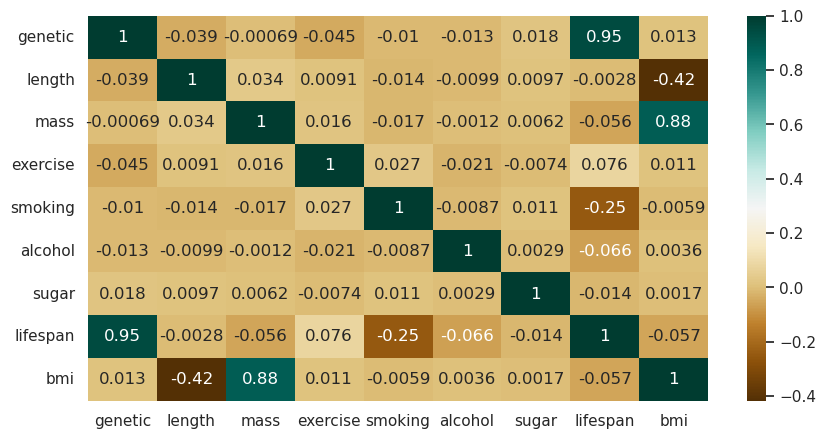

In [134]:
plt.figure(figsize=(10,5))
c= lsdNoOutl.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

All true outliers have been removed from the data frame.  

## Conclusions based on df without outliers
The strongest correlations seem to be between:  
- lifespan and genetic (from +0.92 to + 0.95): the better the one, the better the other one. __You can't influence that with lifestyle changes.__
- lifespan and smoking (- 0.25 - unchanged): the more one smokes, the less ones lifespan
- lifespan and exercise (from + 0.082 to +0.076): the more one exercises the longer the lifespan
- lifespan and alcohol (from - 0.057 to - 0.066 ): the more alcohol one consumes, the lower ones lifespan
- lifespan and bmi (- 0.074) : the lower ones bmi, te longer his/her lifespan

## The influence of bmi on the other variables



### Bmi and genetics 
I'm not sure about the use of this correlation: genetic age is presumably calculated way before the bmi starts to change.

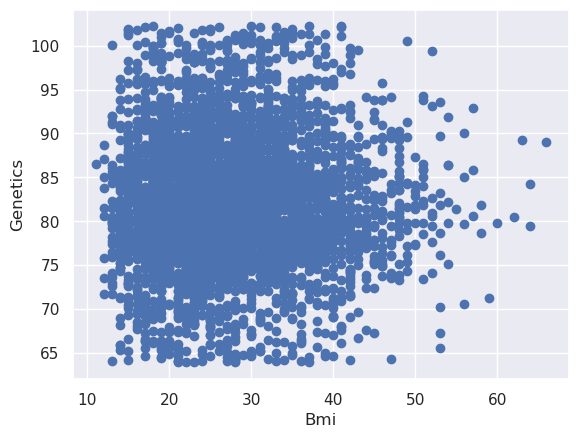

In [135]:
x= lsd['bmi']
y = lsd['genetic']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Genetics')
display(plt.scatter(x, y))

### Bmi and Lenght
Don't expect a usefull figure here (expecting a negative corr)

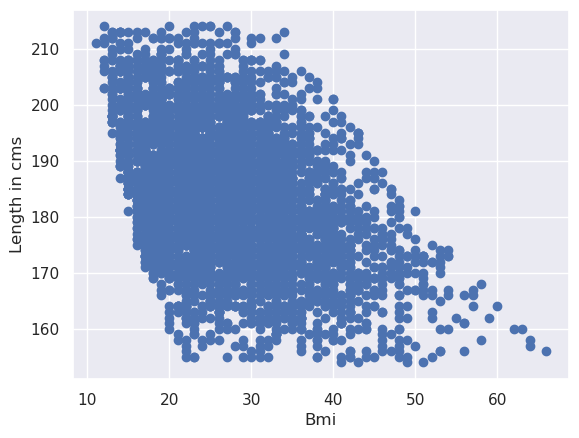

In [136]:
x= lsd['bmi']
y = lsd['length']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Length in cms')
display(plt.scatter(x, y))

### Bmi and mass
Don't expect a usefull visualisation here (expecting a pos corr)

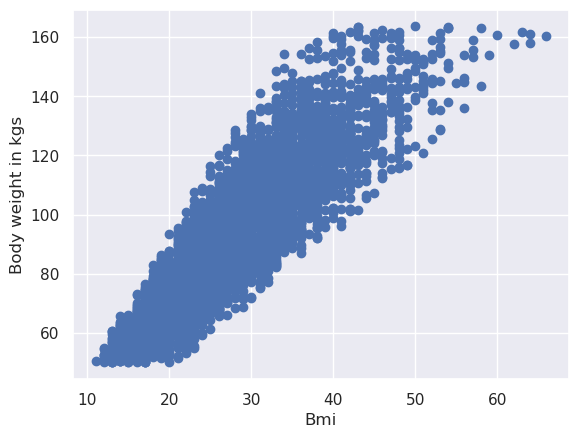

In [137]:
x= lsd['bmi']
y = lsd['mass']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Body weight in kgs')
display(plt.scatter(x, y))

### BMI and Exercise
Expecting a neg corr here. Just curious to see how strong the corrrelation is.

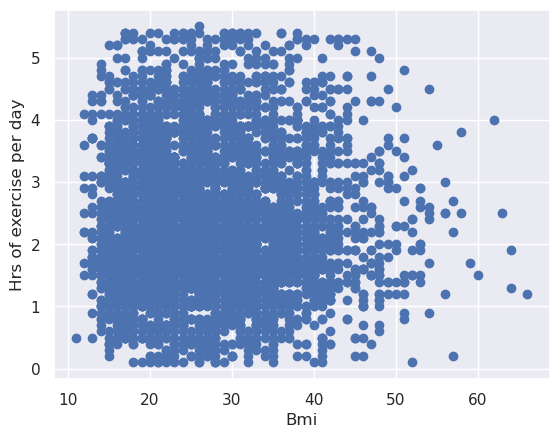

In [138]:
x= lsd['bmi']
y = lsd['exercise']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Hrs of exercise per day')
display(plt.scatter(x, y))

There don't seem to be that much correlation.  
Apparantly there are not that much people with a bmi over 45 (dead) but surprisingly quite a few exercise.

### Bmi and smoking
Expecting a lower bmi when smoking more cigarettes.

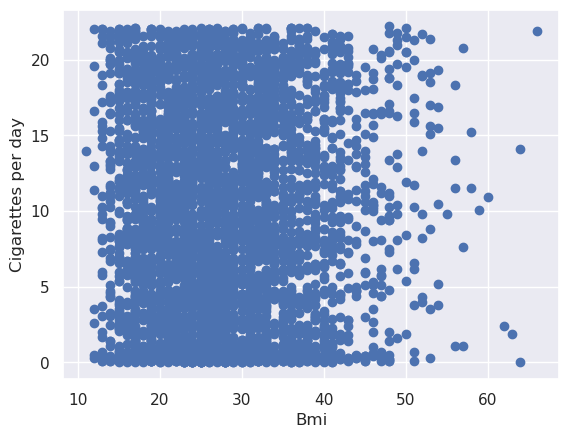

In [139]:
x= lsd['bmi']
y = lsd['smoking']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Cigarettes per day')
display(plt.scatter(x, y))

Unexpected result. Looks like little to no correlation

### Bmi and Alcohol
Expect a higher bmi when drinking more alcohol per day

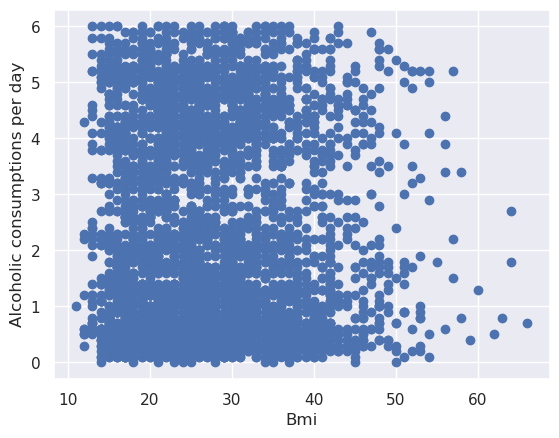

In [140]:
x= lsd['bmi']
y = lsd['alcohol']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Alcoholic consumptions per day')
display(plt.scatter(x, y))

### Bmi and Sugar
Expect a positive corr: the more sugar per day, the higher the bmi 

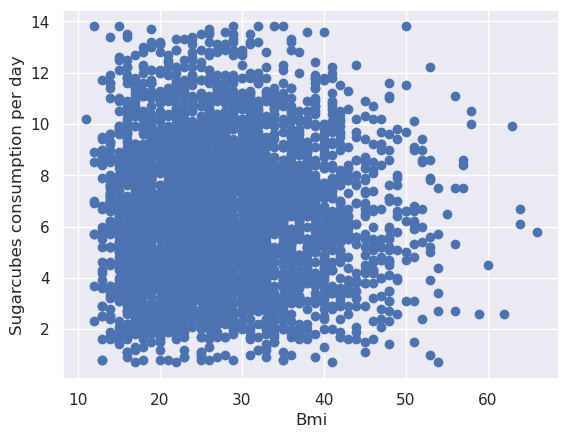

In [141]:
x= lsd['bmi']
y = lsd['sugar']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Sugarcubes consumption per day')
display(plt.scatter(x, y))

### Bmi and Lifespan
Expecting to see that a bmi between 18.5 and 25 lead to a high lifespan.

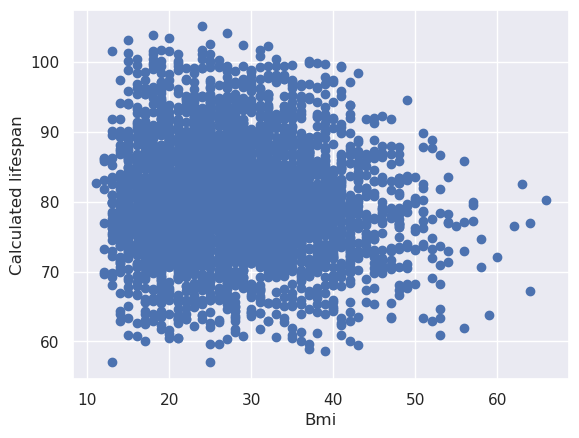

In [142]:
x= lsd['bmi']
y = lsd['lifespan']
xlabel = plt.xlabel('Bmi')
ylabel = plt.ylabel('Calculated lifespan')
display(plt.scatter(x, y))

## BMI column with classification
bmi_cats = [0, 18.5, 25, np.inf]
labels_bmi_cats=['underweight','normal_range','overweight']
new3['bmi_cat']= pd.cut(new3['bmi'], bins=bmi_cats, labels=labels_bmi_cats)

bmi_subcats = [0, 16, 17, 18.5, 25, 30, 35, 40, np.inf]
labels_bmi_subcats=['severe_thinness','moderate_thinness','mild_thinness','normal', 'pre_obese', 'obese_class_I', 'obese_class_II', 'obese_class_III']
new3['bmi_subcat']= pd.cut(new3['bmi'], bins=bmi_subcats, labels=labels_bmi_subcats)


new3.head(12)

In [143]:
# import numpy as np

# bmi_cats = [0, 18.5, 25, np.inf]
# labels_bmi_cats=['underweight','normal_range','overweight']
# lsd['bmi_cat']= pd.cut(lsd['bmi'], bins=bmi_cats, labels=labels_bmi_cats)

# bmi_subcats = [0, 16, 17, 18.5, 25, 30, 35, 40, np.inf]
# labels_bmi_subcats=['severe_thinness','moderate_thinness','mild_thinness','normal', 'pre_obese', 'obese_class_I', 'obese_class_II', 'obese_class_III']
# lsd['bmi_subcat']= pd.cut(lsd['bmi'], bins=bmi_subcats, labels=labels_bmi_subcats)
# lsd.head(12)

In [144]:
import numpy as np
#Read csv file
# lsd = LifeStyleData
lsd = pd.read_csv('lsdata230309.csv', index_col = 0)

lsd['bmi'] = round(lsd['mass']/((lsd['length']**2)*0.0001))
display(lsd.head())

bmi_cats = [0, 18.5, 25, 30, np.inf]
labels_bmi_cats=['underweight','normal_range','overweight', 'obese']
lsd['bmi_cat']= pd.cut(lsd['bmi'], bins=bmi_cats, labels=labels_bmi_cats)

# bmi_subcats = [0, 16, 17, 18.5, 25, 30, 35, 40, np.inf]
# labels_bmi_subcats=['severe_thinness','moderate_thinness','mild_thinness','normal', 'pre_obese', 'obese_class_I', 'obese_class_II', 'obese_class_III']
# lsd['bmi_subcat']= pd.cut(lsd['bmi'], bins=bmi_subcats, labels=labels_bmi_subcats)
lsd.head(12)

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.0
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,36.0
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,36.0
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.0
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,23.0


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_cat
0,73.9,185.0,99.7,0.9,0.0,2.4,6.9,73.1,29.0,overweight
1,86.0,172.0,105.4,1.8,8.1,0.4,4.2,85.0,36.0,obese
2,83.3,176.0,111.4,1.1,0.8,4.6,7.5,81.6,36.0,obese
3,82.8,164.0,111.4,4.7,11.8,1.0,2.9,81.0,41.0,obese
4,78.7,178.0,71.6,1.5,8.3,4.9,5.5,75.0,23.0,normal_range
5,88.2,192.0,54.3,1.8,0.4,2.1,8.0,87.5,15.0,underweight
6,84.1,180.0,91.6,4.3,2.2,0.2,6.0,86.8,28.0,overweight
7,76.8,185.0,127.9,2.6,21.0,1.7,3.7,69.4,37.0,obese
8,92.1,191.0,68.0,1.9,17.8,5.1,7.1,86.1,19.0,normal_range
9,79.0,164.0,118.1,3.7,0.5,1.2,6.1,77.8,44.0,obese


In [171]:
lsd.info()
lsdLight = lsd.drop(["length","mass"], axis='columns')
#lsd.drop(['length'],['mass'])
lsdLight.info()
lsdLight.to_csv('OefenlsdLight230310.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 4095
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   genetic   4086 non-null   float64 
 1   length    4086 non-null   float64 
 2   mass      4086 non-null   float64 
 3   exercise  4086 non-null   float64 
 4   smoking   4086 non-null   float64 
 5   alcohol   4086 non-null   float64 
 6   sugar     4086 non-null   float64 
 7   lifespan  4086 non-null   float64 
 8   bmi       4086 non-null   float64 
 9   bmi_cat   4086 non-null   category
dtypes: category(1), float64(9)
memory usage: 452.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   genetic   4086 non-null   float64 
 1   exercise  4086 non-null   float64 
 2   smoking   4086 non-null   float64 
 3   alcohol   4086 non-null   float64 
 4   sugar  

In [163]:
display(lsd.columns)

Index(['genetic', 'length', 'mass', 'exercise', 'smoking', 'alcohol', 'sugar',
       'lifespan', 'bmi', 'bmi_cat'],
      dtype='object')

In [1]:
import sklearn